In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x,y=load_diabetes(return_X_y=True,as_frame=True)
display(x.head(2))
display(x.shape)
display(y)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204


(442, 10)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [43]:
km=KMeans(n_clusters=2,max_iter=300)
#Return Distance of each datapoint from centroid
display(km.fit_transform(x).shape)
display(km.fit_transform(x)[:][:3])
#Compute cluster centers and predict cluster index for each sample(Assign Catageory)
display(km.fit_predict(x)[:5])
display(km.cluster_centers_)
#WCSS
display(km.inertia_)

(442, 2)

array([[0.16175314, 0.12269888],
       [0.10079787, 0.23085136],
       [0.16248145, 0.14211007]])

array([0, 1, 0, 0, 1])

array([[ 0.01675864,  0.0151435 ,  0.02362297,  0.02055863,  0.02419395,
         0.02588059, -0.02476659,  0.03336044,  0.02998366,  0.02453796],
       [-0.017855  , -0.0161342 , -0.0251684 , -0.02190358, -0.02577673,
        -0.02757372,  0.02638684, -0.03554289, -0.03194521, -0.02614325]])

7.187000018583657

In [45]:
km=KMeans(n_clusters=1)
km.fit_transform(x)
display(km.inertia_)
km=KMeans(n_clusters=2)
km.fit_transform(x)
display(km.inertia_)
km=KMeans(n_clusters=3)
km.fit_transform(x)
display(km.inertia_)

C:\Users\niles\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


10.00000000000055

7.187000018583657

6.514410059086667

C:\Users\niles\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k == 1, wcss == 10.00000000000055
k == 2, wcss == 7.187000018583657
k == 3, wcss == 6.514050600614384
k == 4, wcss == 5.974285532082393
k == 5, wcss == 5.549791167924589
k == 6, wcss == 5.217976374447563


Text(0, 0.5, 'WCSS')

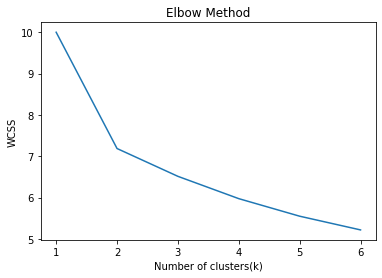

In [47]:
wcssList = []
for k in range(1,7):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(x)
    wcss = kmeans_model.inertia_
    wcssList.append(wcss)
    print(f"k == {k}, wcss == {wcss}")
k_val = range(1,7)
plt.plot(k_val,wcssList)
plt.title("Elbow Method")
plt.xlabel("Number of clusters(k)")
plt.ylabel("WCSS")

#Some Practice for KNN

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


In [11]:
# Load the data
data = np.loadtxt("diabetes.csv", skiprows=1, delimiter=",")

# Split the data into features and labels
X = data[:, :-1]
y = data[:, -1]

# Create a KNN classifier with k=5
clf = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
clf.fit(X, y)


KNeighborsClassifier()

In [12]:

# Predict the class of a new data point
new_data = np.array([5.1, 3.5, 1.4, 0.2])
prediction = clf.predict(new_data)

# Print the prediction
print(prediction)

ValueError: Expected 2D array, got 1D array instead:
array=[5.1 3.5 1.4 0.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.